<a href="https://colab.research.google.com/github/AhmedTouj/sale-predictions/blob/main/AHMED_TOUJANI_EXAM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Mod_employee_attrition - Temp employee_attrition.csv')

In [ ]:
df[df.duplicated(keep=False)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
13,34,No,Travel_Rarely,Research & Development,19,2,Medical,1,18,2,...,3,80,1,3,2,3,2,2,1,2
14,34,No,Travel_Rarely,Research & Development,19,2,Medical,1,18,2,...,3,80,1,3,2,3,2,2,1,2
158,58,No,Travel_Rarely,Research & Development,9,3,Medical,1,214,2,...,2,80,1,9,3,2,1,0,0,0
159,58,No,Travel_Rarely,Research & Development,9,3,Medical,1,214,2,...,2,80,1,9,3,2,1,0,0,0
624,32,No,Travel_Rarely,Sales,13,4,Life Sciences,1,859,2,...,3,80,1,8,3,2,5,2,0,3
625,32,No,Travel_Rarely,Sales,13,4,Life Sciences,1,859,2,...,3,80,1,8,3,2,5,2,0,3
814,38,No,Travel_Rarely,Sales,2,2,Marketing,1,1125,4,...,3,80,0,10,2,3,1,0,0,0
815,38,No,Travel_Rarely,Sales,2,2,Marketing,1,1125,4,...,3,80,0,10,2,3,1,0,0,0
1144,44,No,Travel_Rarely,Research & Development,7,3,Medical,1,1608,2,...,4,80,1,23,4,2,22,7,1,10
1145,44,No,Travel_Rarely,Research & Development,7,3,Medical,1,1608,2,...,4,80,1,23,4,2,22,7,1,10


In [ ]:
df.drop_duplicates(inplace = True)
df[df.duplicated(keep=False)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1474
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    588 non-null    object
 11  HourlyRate                1470 non-null   object
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [ ]:
df[df.isna().any(axis=1)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,Research & Development,2,2,Life Sciences,1,8,4,...,3,80,0,8,2,2,7,7,3,6
7,30,No,Travel_Rarely,Research & Development,24,1,Life Sciences,1,11,4,...,2,80,1,1,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,36,No,Travel_Frequently,Research & Development,23,2,Medical,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1471,39,No,Travel_Rarely,Research & Development,6,1,Medical,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1472,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1473,49,No,Travel_Frequently,Sales,2,3,Medical,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


The column gender is only filled by female cells and male cells are empty. We fill them by "male".
We cannot delete missing data since they represent important information (well exceeding 2%).

In [ ]:
df['Gender'].fillna('male',inplace=True)

In [ ]:
df[df.isna().any(axis=1)]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


Ensure all columns match the data types listed in the data dictionary.

In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                  object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
DailyRate                    int64
WeeklyRate                   int64
YearlyRate                   int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
df['HourlyRate']= df['HourlyRate'].str.strip('_')

In [ ]:
df['HourlyRate'] = df['HourlyRate'].astype(int)

In [ ]:
df['YearsAtCompany'] = df['YearsAtCompany'].astype(int)

let's check for inconsistencies in the values

In [ ]:
df['Gender'].unique()

array(['Female', 'male'], dtype=object)

In [ ]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [ ]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [ ]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Age'].unique()

array([ 41,  49,  37,  33,  27,  32,  59,  30,  38,  36,  35,  29,  31,
        34,  28,  22,  53,  24,  21,  42,  44,  46,  39,  43,  50,  26,
        48,  55,  45,  56,  23,  51,  40,  54, 578,  20,  25,  58,  19,
        57,  52,  47,  18,  60])

In [ ]:
df['Age'].replace({578:57},inplace=True)
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       57, 20, 25, 58, 19, 52, 47, 18, 60])

In [ ]:
df['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25])

2/ Data Visualization

<Axes: xlabel='MaritalStatus', ylabel='HourlyRate'>

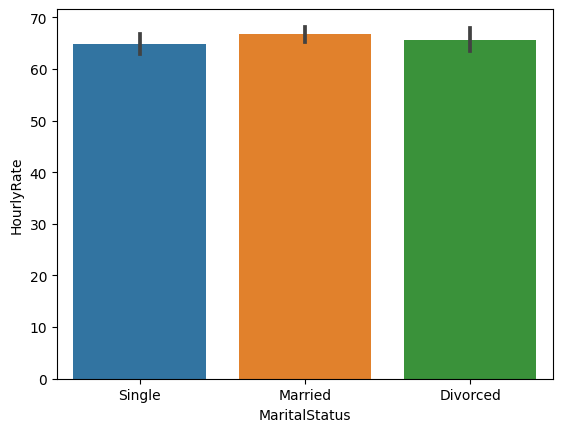

In [ ]:
sns.barplot(data=df, x='MaritalStatus',y='HourlyRate')

Married people have the highest average hourly rate

<Axes: xlabel='Education', ylabel='HourlyRate'>

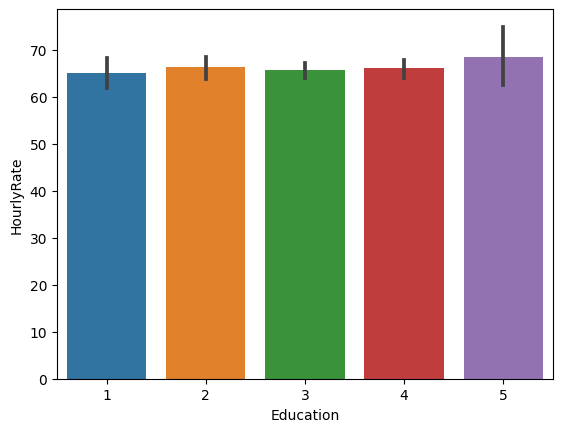

In [ ]:
sns.barplot(data=df, x='Education',y='HourlyRate')

Those who have the fifth level of education have the highest average hourly rate

<Axes: xlabel='Education', ylabel='TotalWorkingYears'>

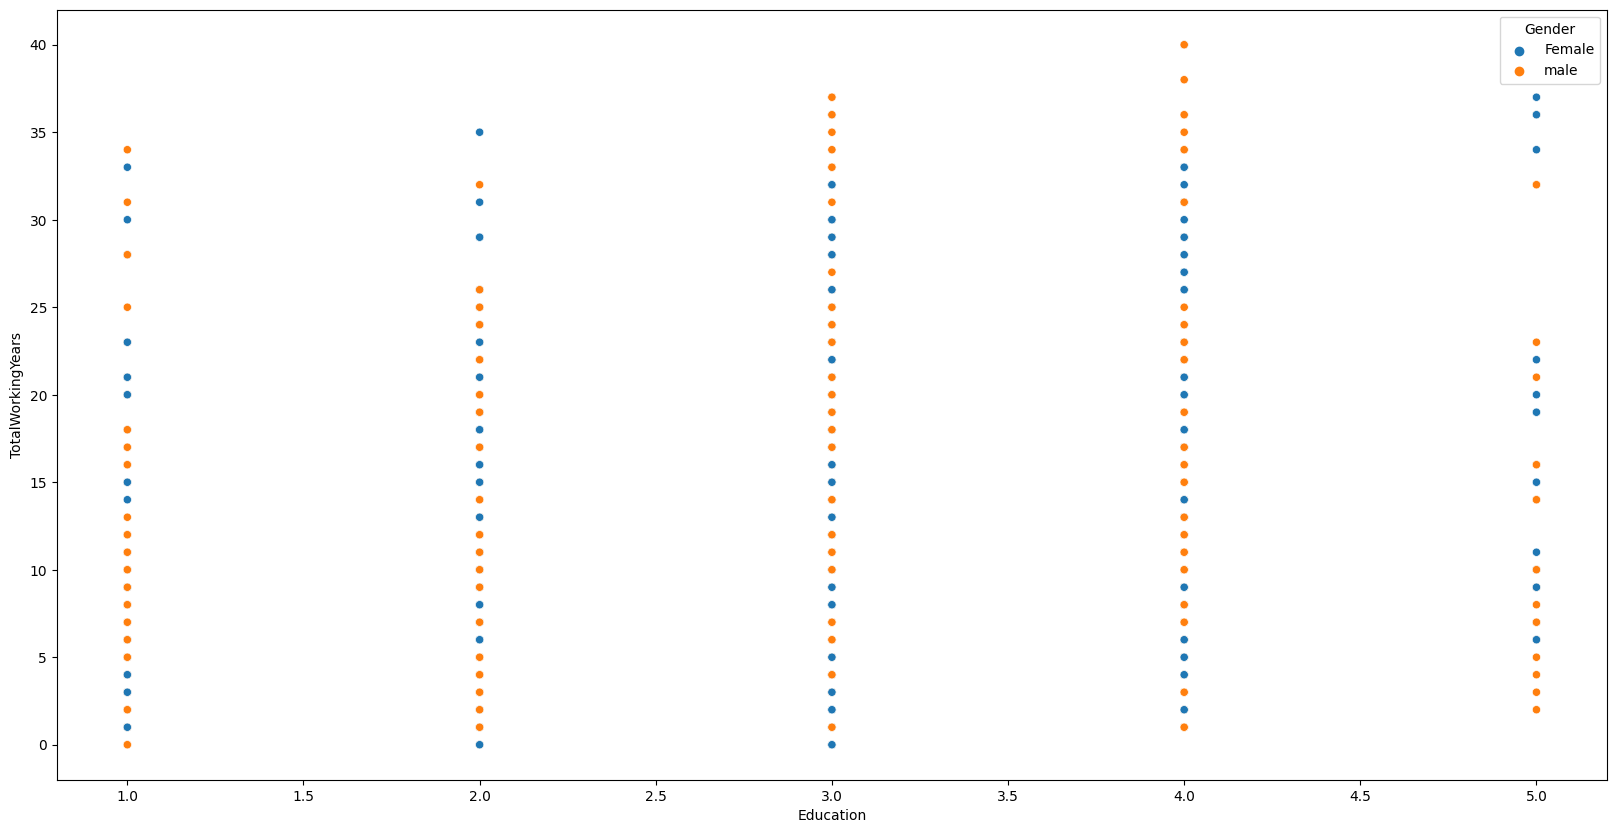

In [ ]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,data=df,x='Education' ,y='TotalWorkingYears',hue='Gender')

People whose have an education level of 3 or 4 or 5 have the higher total working years. Females whose have an eduction level of 3 or 4 have the highest total working years while for the levels 1 and 2 we find them with fewer total working years.

<Axes: xlabel='Gender', ylabel='TotalWorkingYears'>

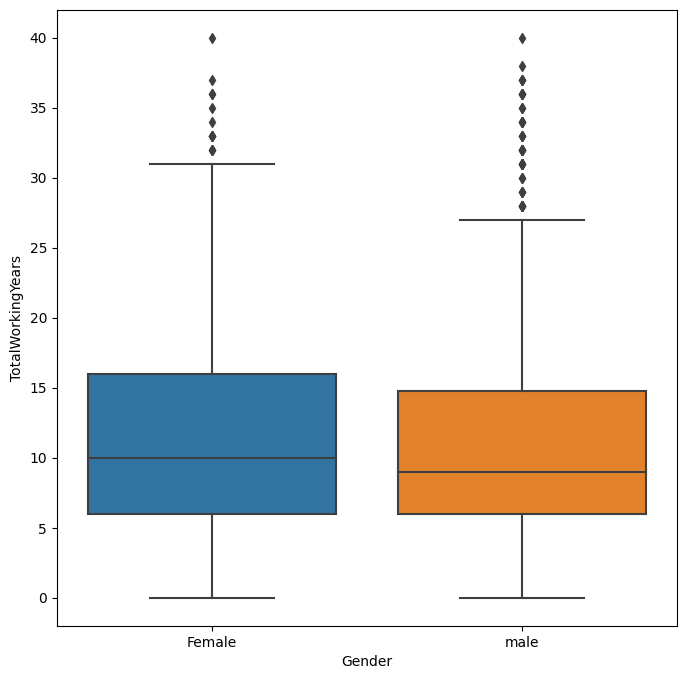

In [ ]:
dims = (8, 8)
fig, ax = plt.subplots(figsize=dims)
sns.boxplot(data=df, x='Gender', y='TotalWorkingYears',ax=ax)

males have more outliers, whereas we can see that data is more spread out for females which means women are inclined to work more years than men.